# Project Title: AI-Based Optimization of Matrix Multiplication Performance Using Reinforcement Learning

### Project Objective:
The goal of this project is to optimize matrix multiplication using Reinforcement Learning (RL), where an agent learns to partition matrices and compute products in an optimized way based on hardware and computational constraints. This will be compared to traditional matrix multiplication methods, including the naive and Strassen’s algorithms.

Generate the matrix data for data collection:
- Define matrix types (dense, sparse, etc.).
- Collect performance metrics like execution time and memory usage.

### 1. Import Libraries

In [ ]:
# Cell 1: Import libraries
import os
import numpy as np
import pandas as pd
import time
import memory_profiler  
import matplotlib.pyplot as plt

# Ensure matplotlib plots inline in the notebook
%matplotlib inline

### 2. Matrix Generation Functions

In [4]:
# Cell 2: Matrix generation functions
# Function to generate dense matrix
def generate_dense_matrix(size):
    return np.random.rand(size, size)

# Function to generate sparse matrix (10% non-zero entries)
def generate_sparse_matrix(size):
    sparse_matrix = np.random.rand(size, size)
    sparse_matrix[sparse_matrix < 0.9] = 0  # 90% zeros
    return sparse_matrix


### 3. Matrix Multiplication and Benchmark Functions

In [5]:
# Cell 3: Matrix multiplication and benchmarking functions
# Naive matrix multiplication (O(n³))
def naive_multiplication(A, B):
    return np.dot(A, B)

# Measure execution time and memory usage
def benchmark_matrix_multiplication(A, B, algorithm):
    # Measure time
    start_time = time.time()
    
    # Track memory usage using memory_profiler
    mem_usage_before = memory_profiler.memory_usage()[0]
    
    result = algorithm(A, B)
    
    end_time = time.time()
    mem_usage_after = memory_profiler.memory_usage()[0]
    
    exec_time = end_time - start_time
    mem_usage = mem_usage_after - mem_usage_before  # Memory difference in MB
    
    return exec_time, mem_usage, result


### 4. plot the results

In [6]:
# Cell 4: Plotting function
def printout(df, filename='matrix_benchmark_plot.png'):
    # Create 'results' directory if it doesn't exist
    if not os.path.exists('results'):
        os.makedirs('results')

    # Plot the execution time and memory usage for different matrix sizes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot execution time
    for matrix_type in df['Type'].unique():
        subset = df[df['Type'] == matrix_type]
        ax1.plot(subset['Size'], subset['Time (s)'], label=matrix_type)
    ax1.set_xlabel('Matrix Size')
    ax1.set_ylabel('Execution Time (s)')
    ax1.set_title('Matrix Multiplication Execution Time')
    ax1.legend()

    # Plot memory usage
    for matrix_type in df['Type'].unique():
        subset = df[df['Type'] == matrix_type]
        ax2.plot(subset['Size'], subset['Memory (MB)'], label=matrix_type)
    ax2.set_xlabel('Matrix Size')
    ax2.set_ylabel('Memory Usage (MB)')
    ax2.set_title('Matrix Multiplication Memory Usage')
    ax2.legend()

    plt.tight_layout()



### 5. Main Benchmarking Logic

In [ ]:
# Cell 5: Main function to run benchmarks
def run_benchmarks():
    # Define matrix sizes
    matrix_sizes = [100, 500, 1000]  # Sizes: 100x100, 500x500, 1000x1000
    results = []

    for size in matrix_sizes:
        # Generate dense and sparse matrices
        dense_matrix = generate_dense_matrix(size)
        sparse_matrix = generate_sparse_matrix(size)
        
        # Benchmark dense x dense matrix multiplication
        exec_time, mem_usage, result = benchmark_matrix_multiplication(dense_matrix, dense_matrix, naive_multiplication)
        results.append({'Size': size, 'Type': 'Dense x Dense', 'Algorithm': 'Naive', 'Time (s)': exec_time, 'Memory (MB)': mem_usage})
        
        # Benchmark sparse x sparse matrix multiplication
        exec_time, mem_usage, result = benchmark_matrix_multiplication(sparse_matrix, sparse_matrix, naive_multiplication)
        results.append({'Size': size, 'Type': 'Sparse x Sparse', 'Algorithm': 'Naive', 'Time (s)': exec_time, 'Memory (MB)': mem_usage})

        # Benchmark dense x sparse matrix multiplication
        exec_time, mem_usage, result = benchmark_matrix_multiplication(dense_matrix, sparse_matrix, naive_multiplication)
        results.append({'Size': size, 'Type': 'Dense x Sparse', 'Algorithm': 'Naive', 'Time (s)': exec_time, 'Memory (MB)': mem_usage})
        
        # Benchmark sparse x dense matrix multiplication
        exec_time, mem_usage, result = benchmark_matrix_multiplication(sparse_matrix, dense_matrix, naive_multiplication)
        results.append({'Size': size, 'Type': 'Sparse x Dense', 'Algorithm': 'Naive', 'Time (s)': exec_time, 'Memory (MB)': mem_usage})

    # Convert results to DataFrame
    df = pd.DataFrame(results)
    print("Benchmark results collected into DataFrame:")    
    pd.set_option('display.max_rows', None)
    print(df)
    
    return df


### 6. Run Benchmarks

Benchmark results collected into DataFrame:
    Size             Type Algorithm  Time (s)  Memory (MB)
0    100    Dense x Dense     Naive  0.100700     0.078125
1    100  Sparse x Sparse     Naive  0.100717     0.074219
2    100   Dense x Sparse     Naive  0.100842     0.000000
3    100   Sparse x Dense     Naive  0.101308     0.000000
4    500    Dense x Dense     Naive  0.104662     1.910156
5    500  Sparse x Sparse     Naive  0.105032     1.910156
6    500   Dense x Sparse     Naive  0.104467     1.910156
7    500   Sparse x Dense     Naive  0.104488     1.910156
8   1000    Dense x Dense     Naive  0.129406     7.632812
9   1000  Sparse x Sparse     Naive  0.129467     7.632812
10  1000   Dense x Sparse     Naive  0.129321     7.632812
11  1000   Sparse x Dense     Naive  0.128822     7.632812


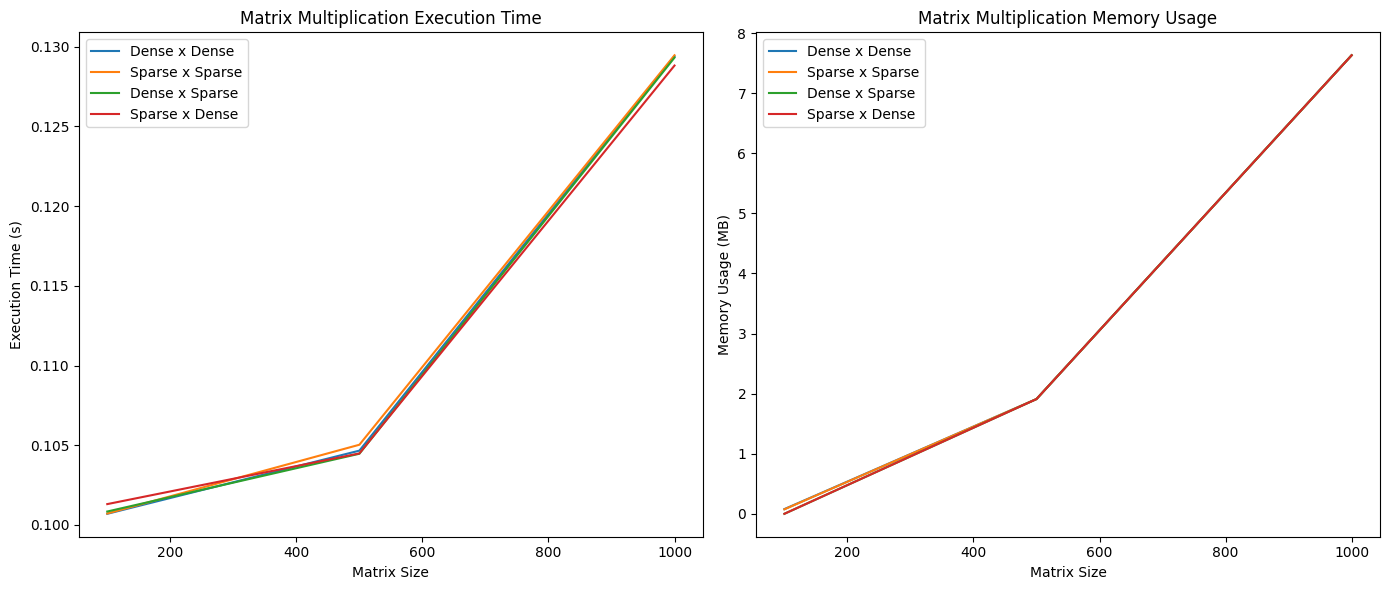

In [10]:
df = run_benchmarks()
printout(df)